In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
merge_df = pd.read_csv('./Dataset/final_merge.csv', index_col=0)
merge_df.head()

,date,water_level,precipitation,flood_occurred
0,2016-01-01,9.3,0.0,False
1,2016-01-02,9.3,0.0,False
2,2016-01-03,9.3,0.0,False
3,2016-01-04,9.3,0.0,False
4,2016-01-05,9.3,0.0,False


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3282 entries, 0 to 3281
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3282 non-null   object 
 1   water_level     3282 non-null   float64
 2   precipitation   3282 non-null   float64
 3   flood_occurred  3282 non-null   bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 105.8+ KB


In [7]:
merge_df['date'] = pd.to_datetime(merge_df['date'])

In [8]:
merge_df['day'] = merge_df['date'].dt.day
merge_df['month'] = merge_df['date'].dt.month
merge_df['year'] = merge_df['date'].dt.year

In [9]:
merge_df.head()

,date,water_level,precipitation,flood_occurred,day,month,year
0,2016-01-01,9.3,0.0,False,1,1,2016
1,2016-01-02,9.3,0.0,False,2,1,2016
2,2016-01-03,9.3,0.0,False,3,1,2016
3,2016-01-04,9.3,0.0,False,4,1,2016
4,2016-01-05,9.3,0.0,False,5,1,2016


In [11]:
years = merge_df['year'].unique()
months = merge_df['month'].unique()

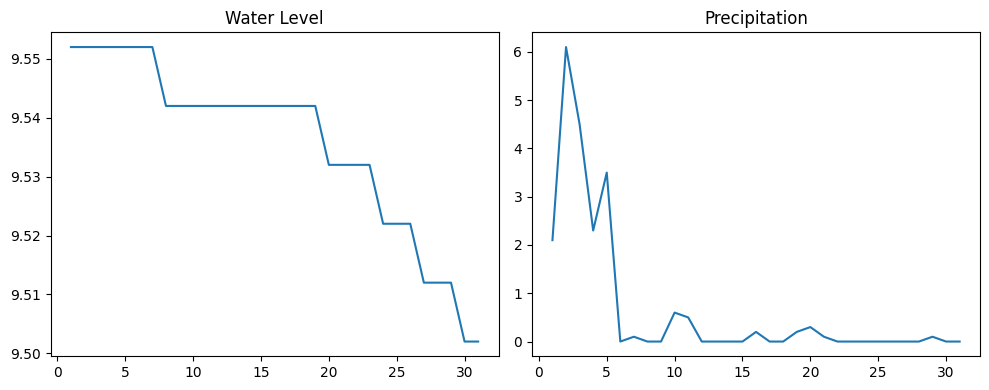

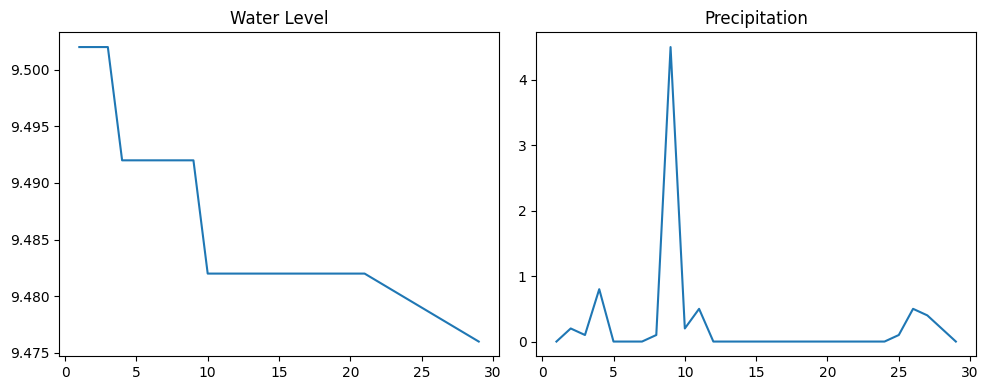

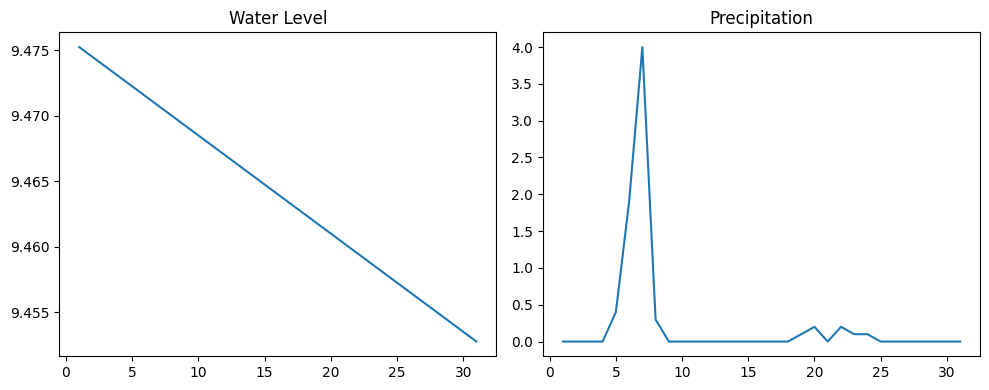

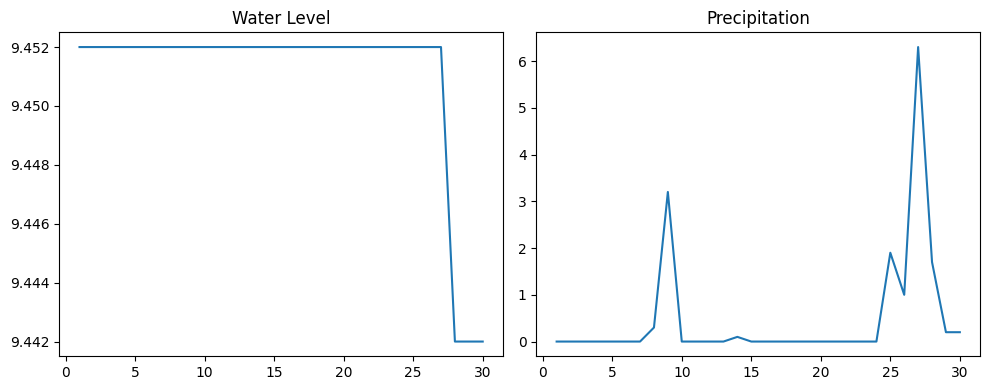

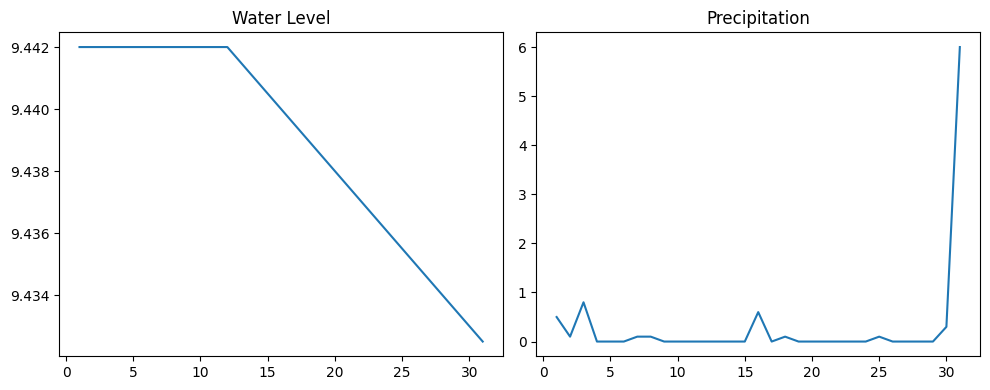

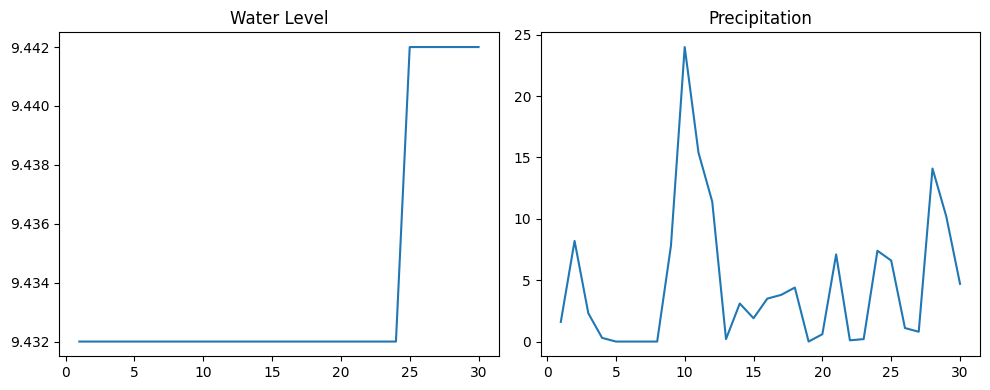

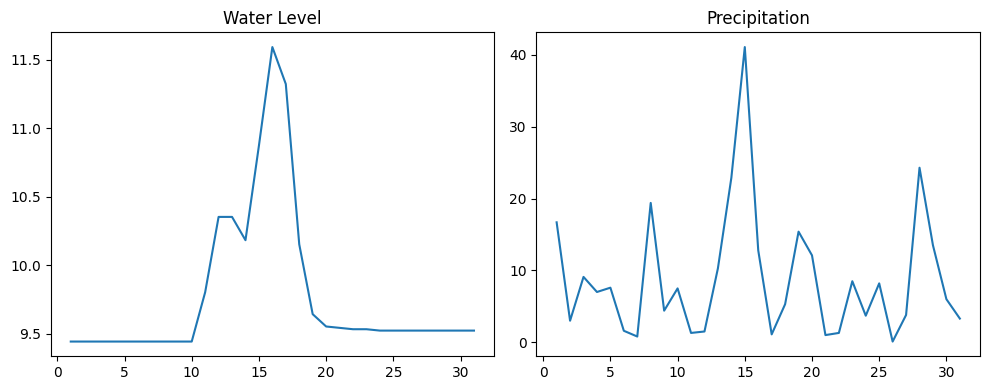

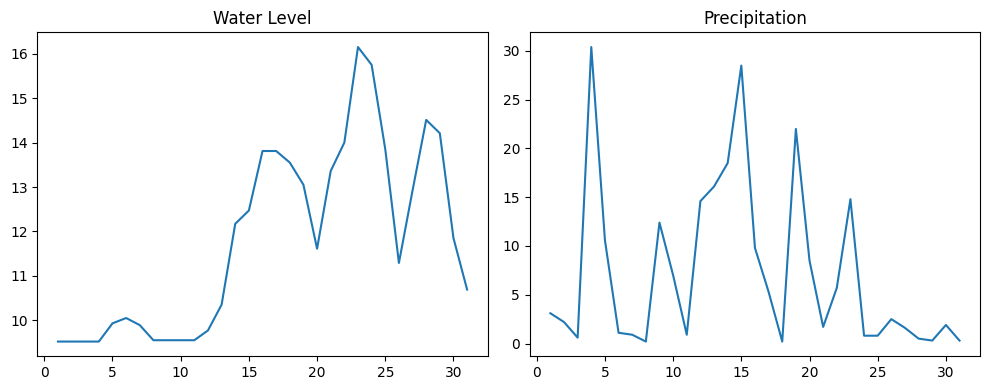

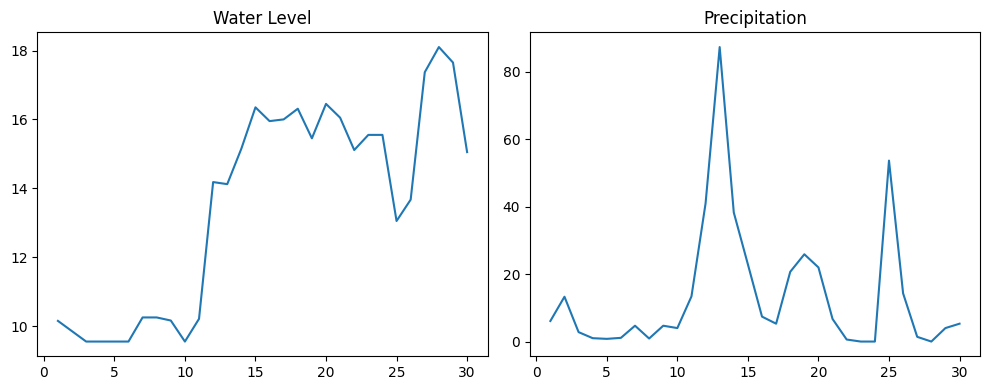

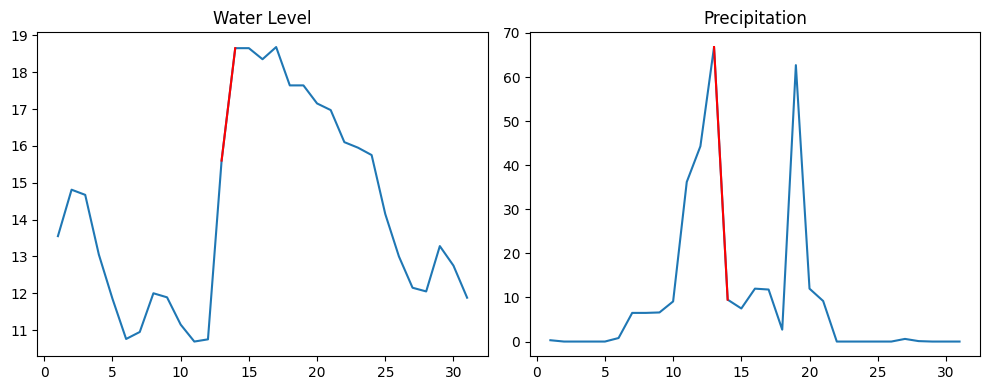

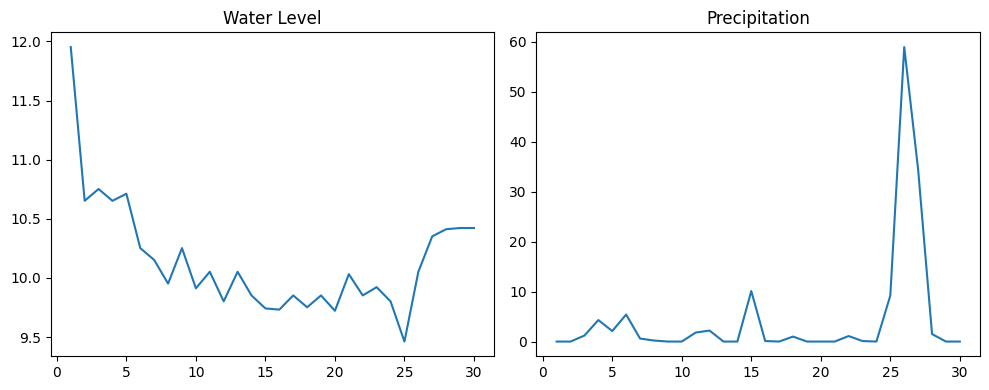

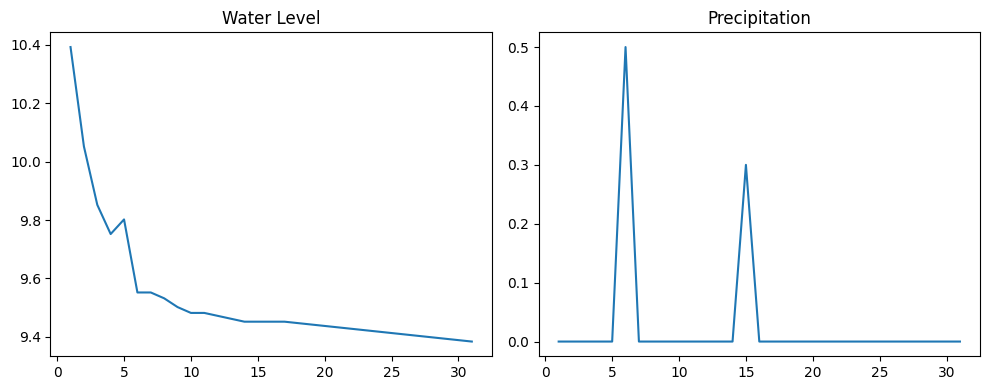

In [18]:
for year in [2020]:
    for month in months:
        sub_data = merge_df[(merge_df['year'] == year) & (merge_df['month'] == month)]
        flood_df = sub_data[sub_data['flood_occurred'] == True]

        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].plot(sub_data['day'], sub_data['water_level'])
        axs[0].plot(flood_df['day'], flood_df['water_level'], color='red')
        axs[0].set_title('Water Level')

        
        axs[1].plot(sub_data['day'], sub_data['precipitation']) 
        axs[1].plot(flood_df['day'], flood_df['precipitation'], color='red')
        axs[1].set_title('Precipitation')

        plt.tight_layout()
        plt.show()

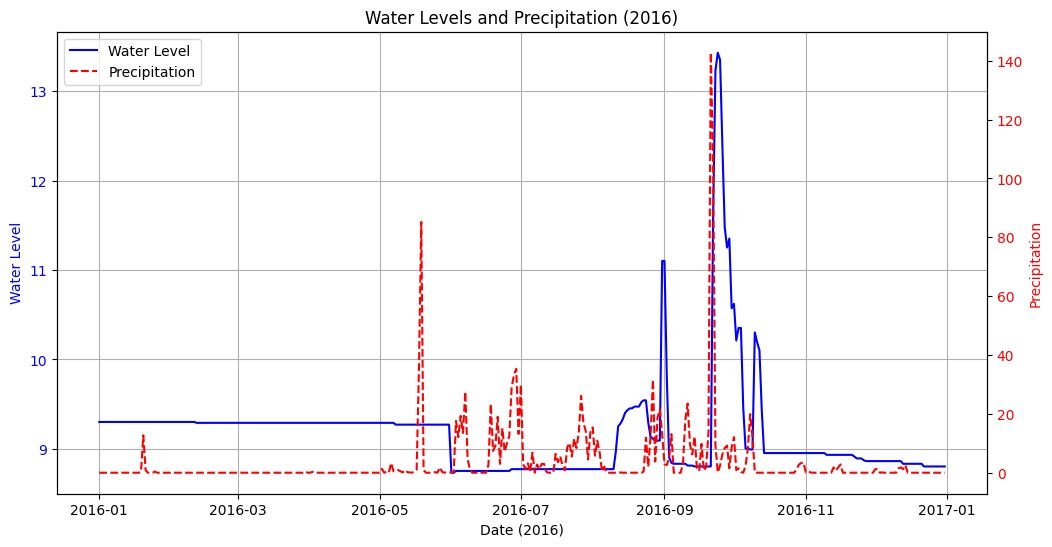

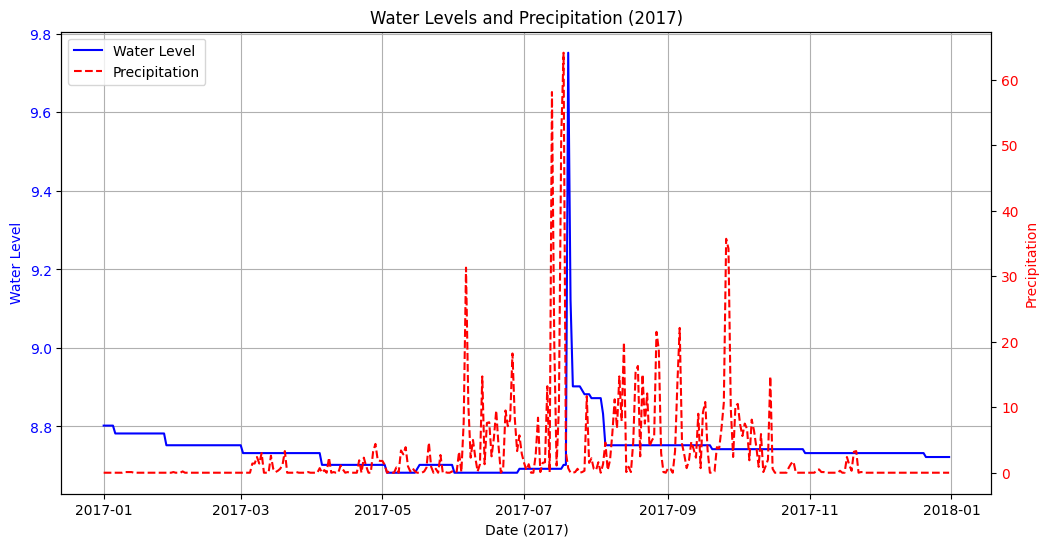

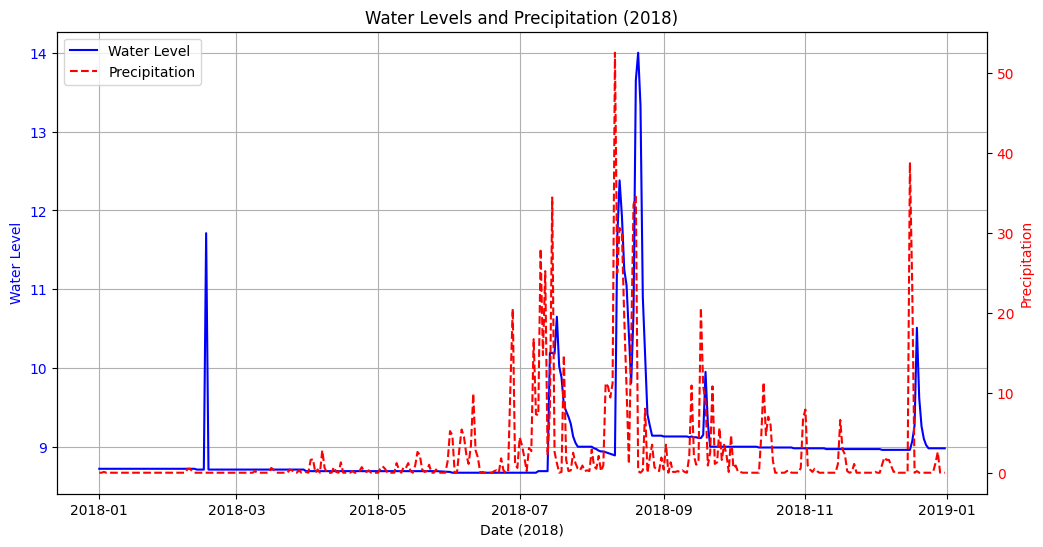

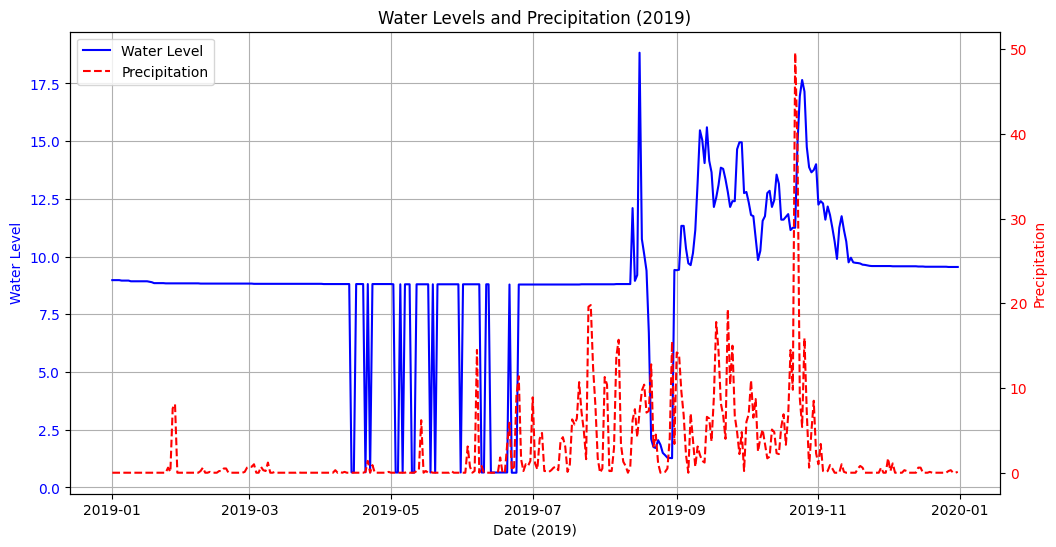

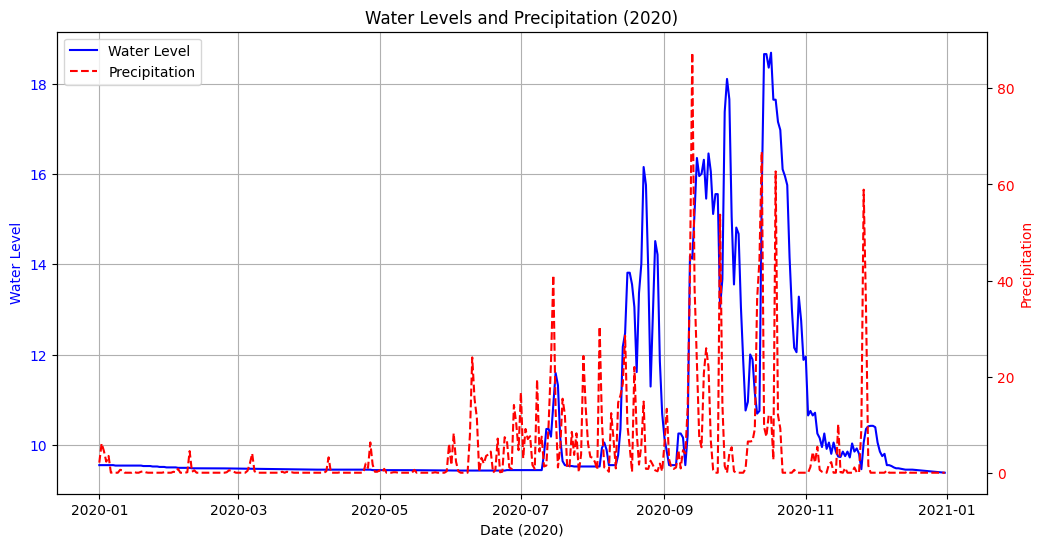

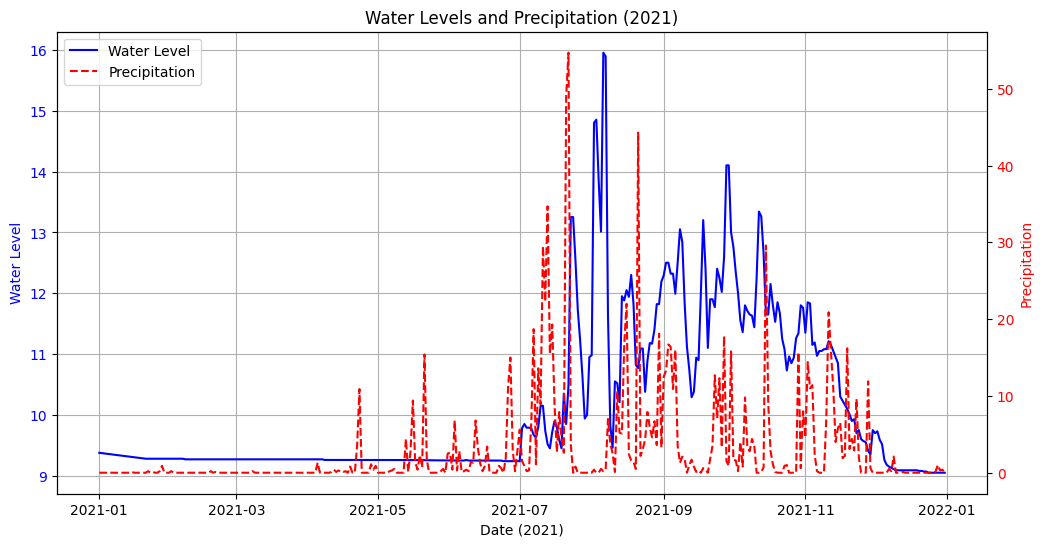

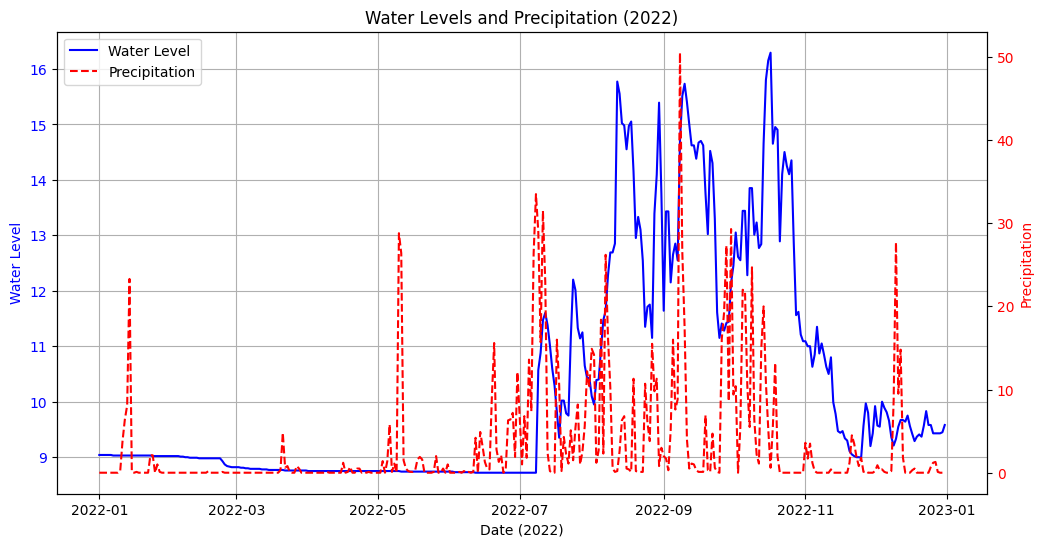

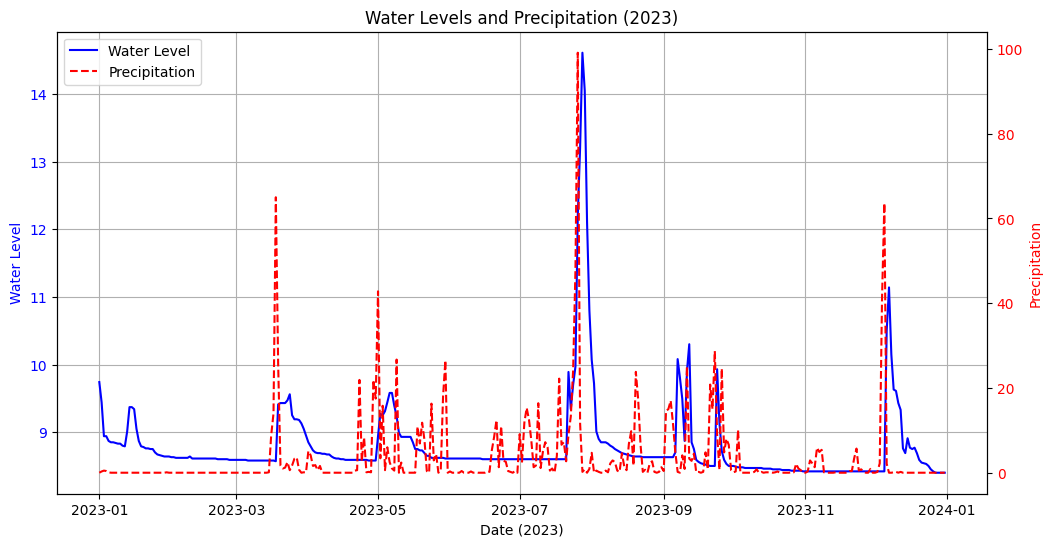

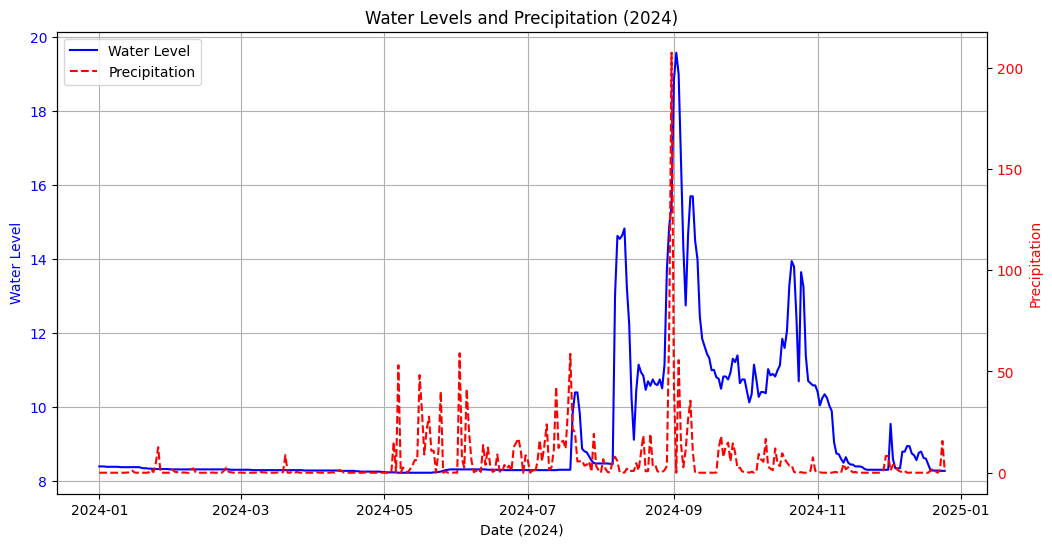

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "./Dataset/final_merge.csv"
data = pd.read_csv(data_path)

data['date'] = pd.to_datetime(data['date'])

years = data['date'].dt.year.unique()

for year in years:
    year_data = data[data['date'].dt.year == year]
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot water level
    ax1.plot(year_data['date'], year_data['water_level'], label="Water Level", color="blue")
    ax1.set_xlabel(f"Date ({year})")
    ax1.set_ylabel("Water Level", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Add a secondary y-axis for precipitation
    ax2 = ax1.twinx()
    ax2.plot(year_data['date'], year_data['precipitation'], label="Precipitation", color="red", linestyle='--')
    ax2.set_ylabel("Precipitation", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Title and grid
    plt.title(f"Water Levels and Precipitation ({year})")
    ax1.grid(True)

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

    plt.show()

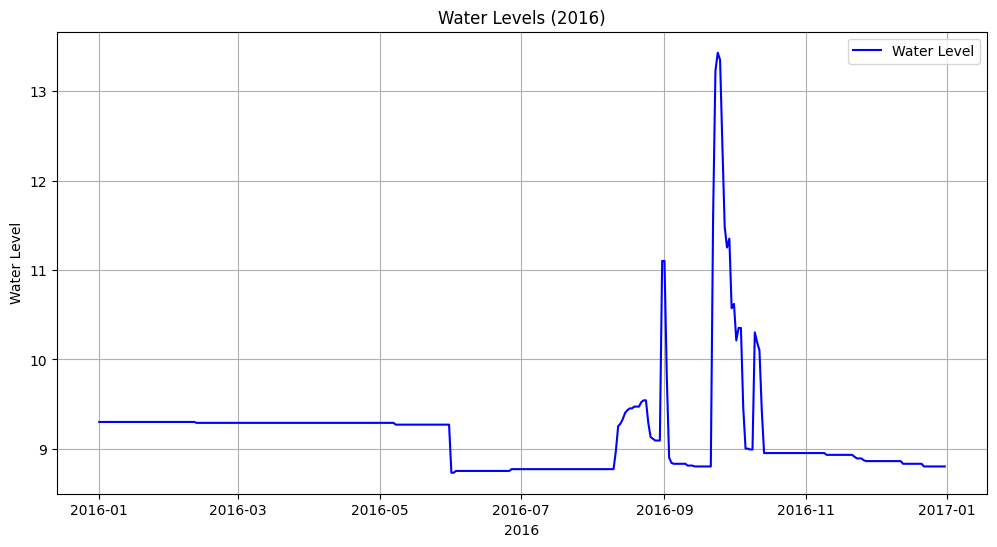

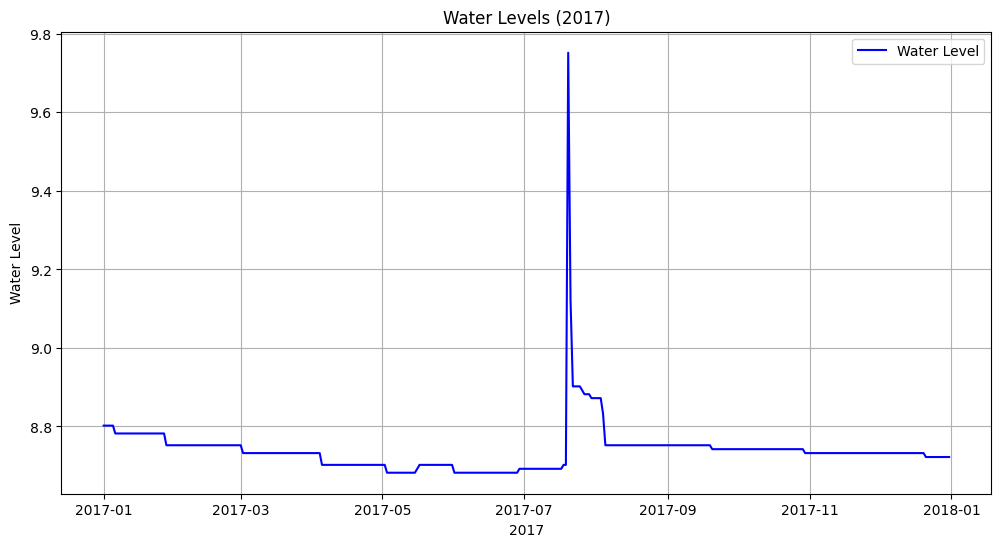

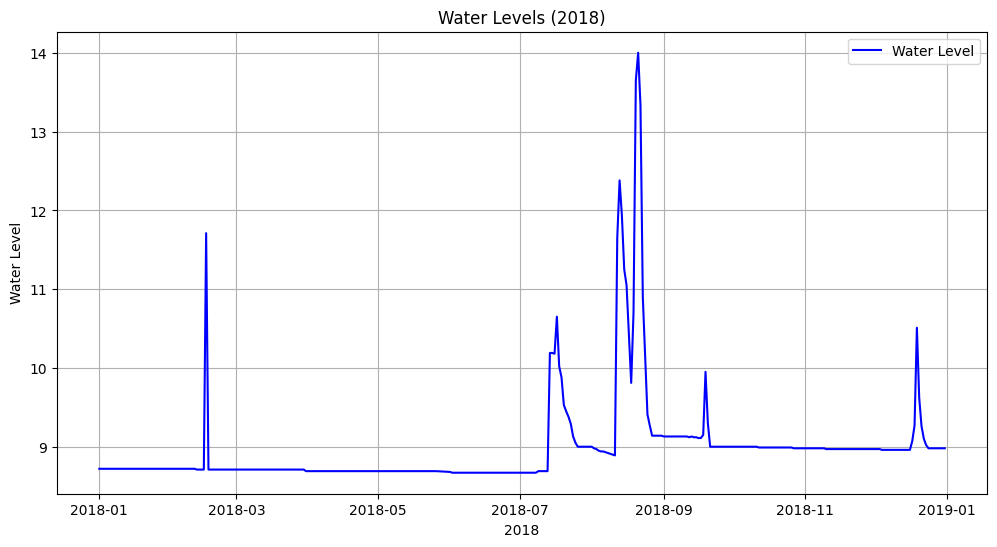

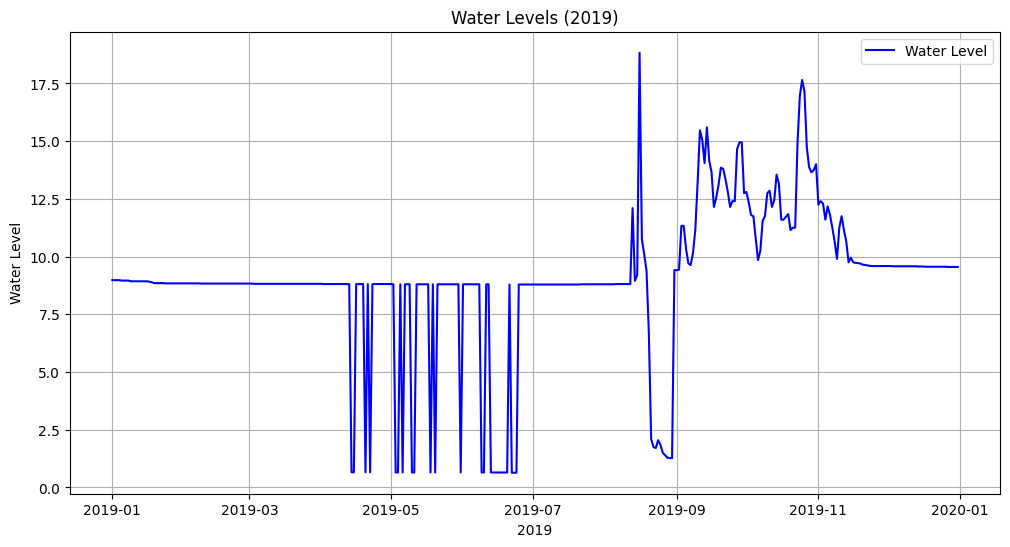

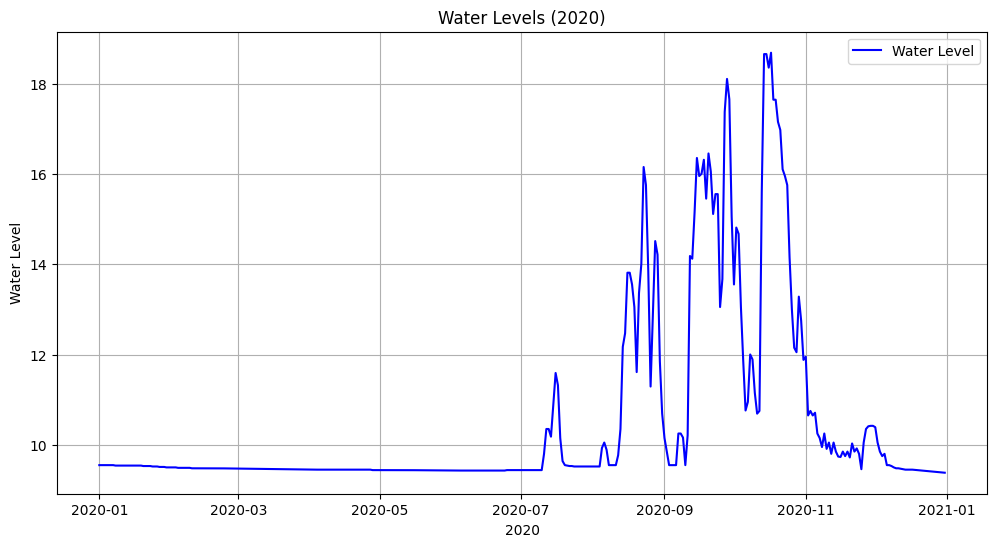

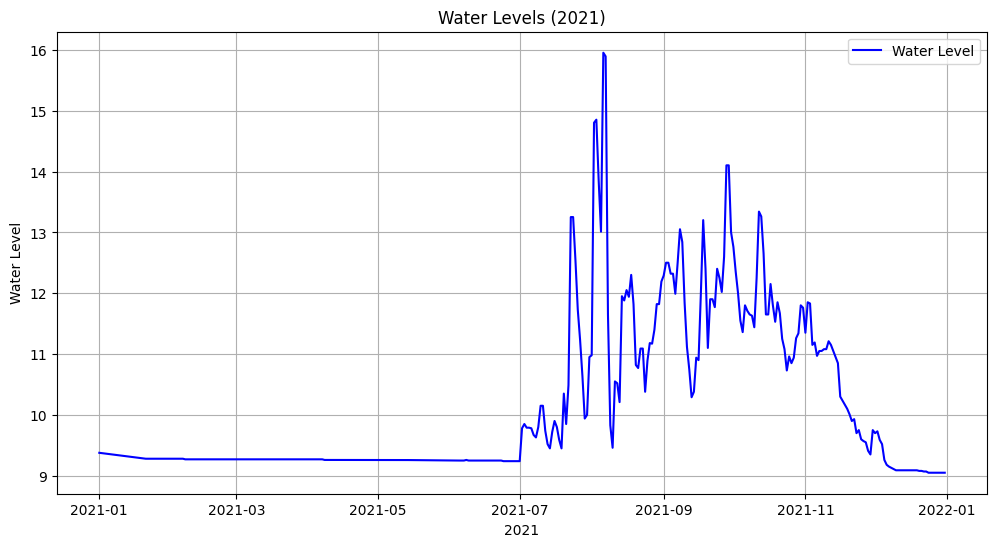

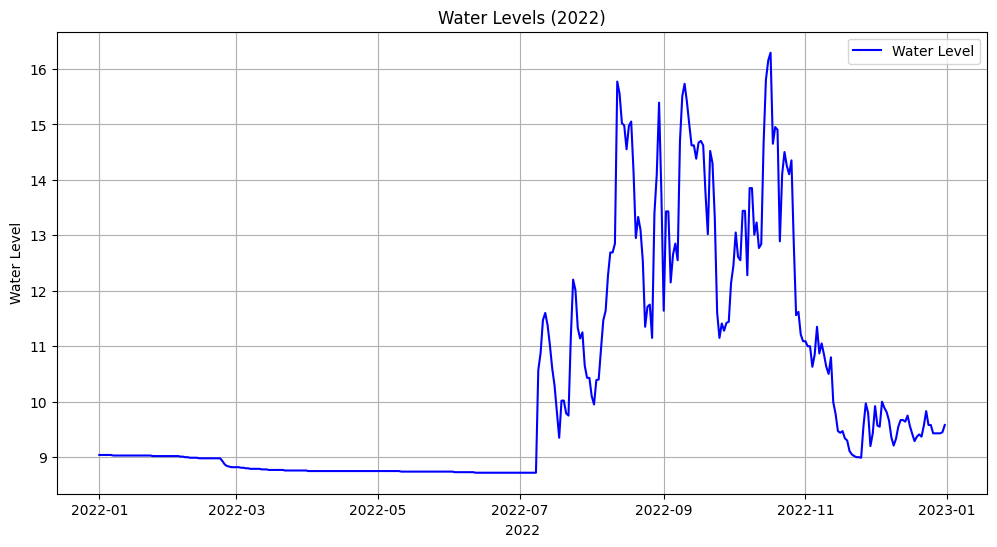

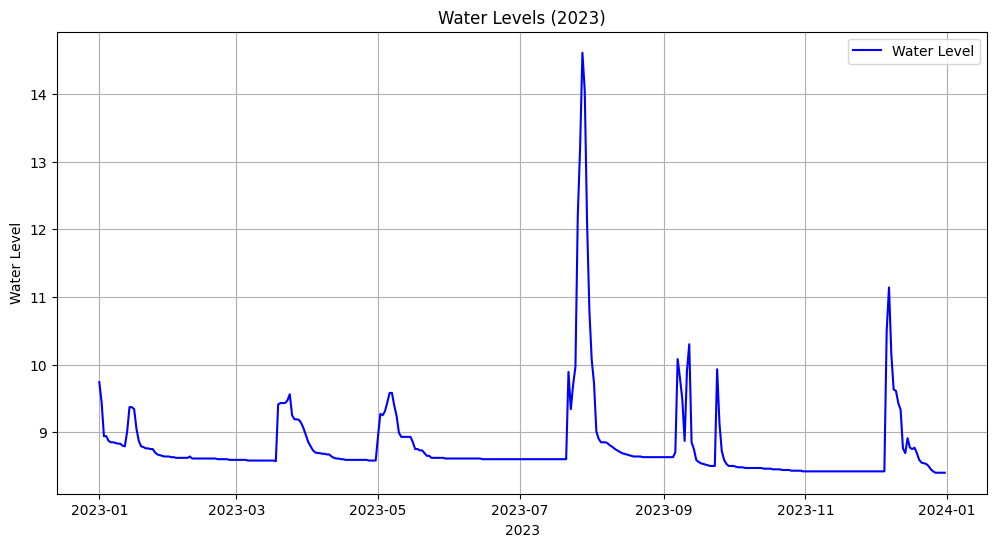

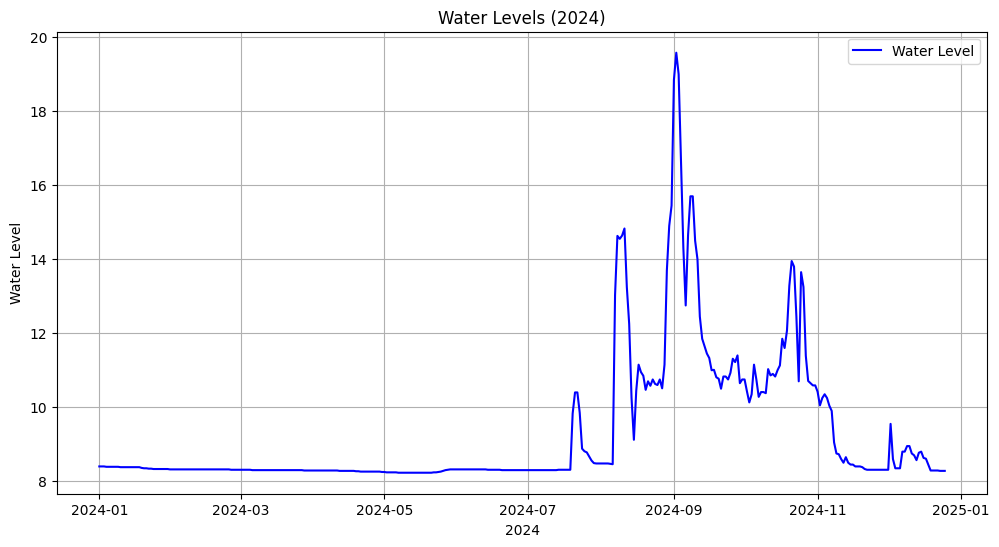

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "./Dataset/final_merge.csv"
data = pd.read_csv(data_path)

data['date'] = pd.to_datetime(data['date'])

years = data['date'].dt.year.unique()

for year in years:
    year_data = data[(data['date'].dt.year == year)]
    plt.figure(figsize=(12, 6))
    plt.plot(year_data['date'], year_data['water_level'], label="Water Level", color="blue")
    plt.xlabel(f"{year}")
    plt.ylabel("Water Level")
    plt.title(f"Water Levels ({year})")
    plt.legend()
    plt.grid(True)
    plt.show()

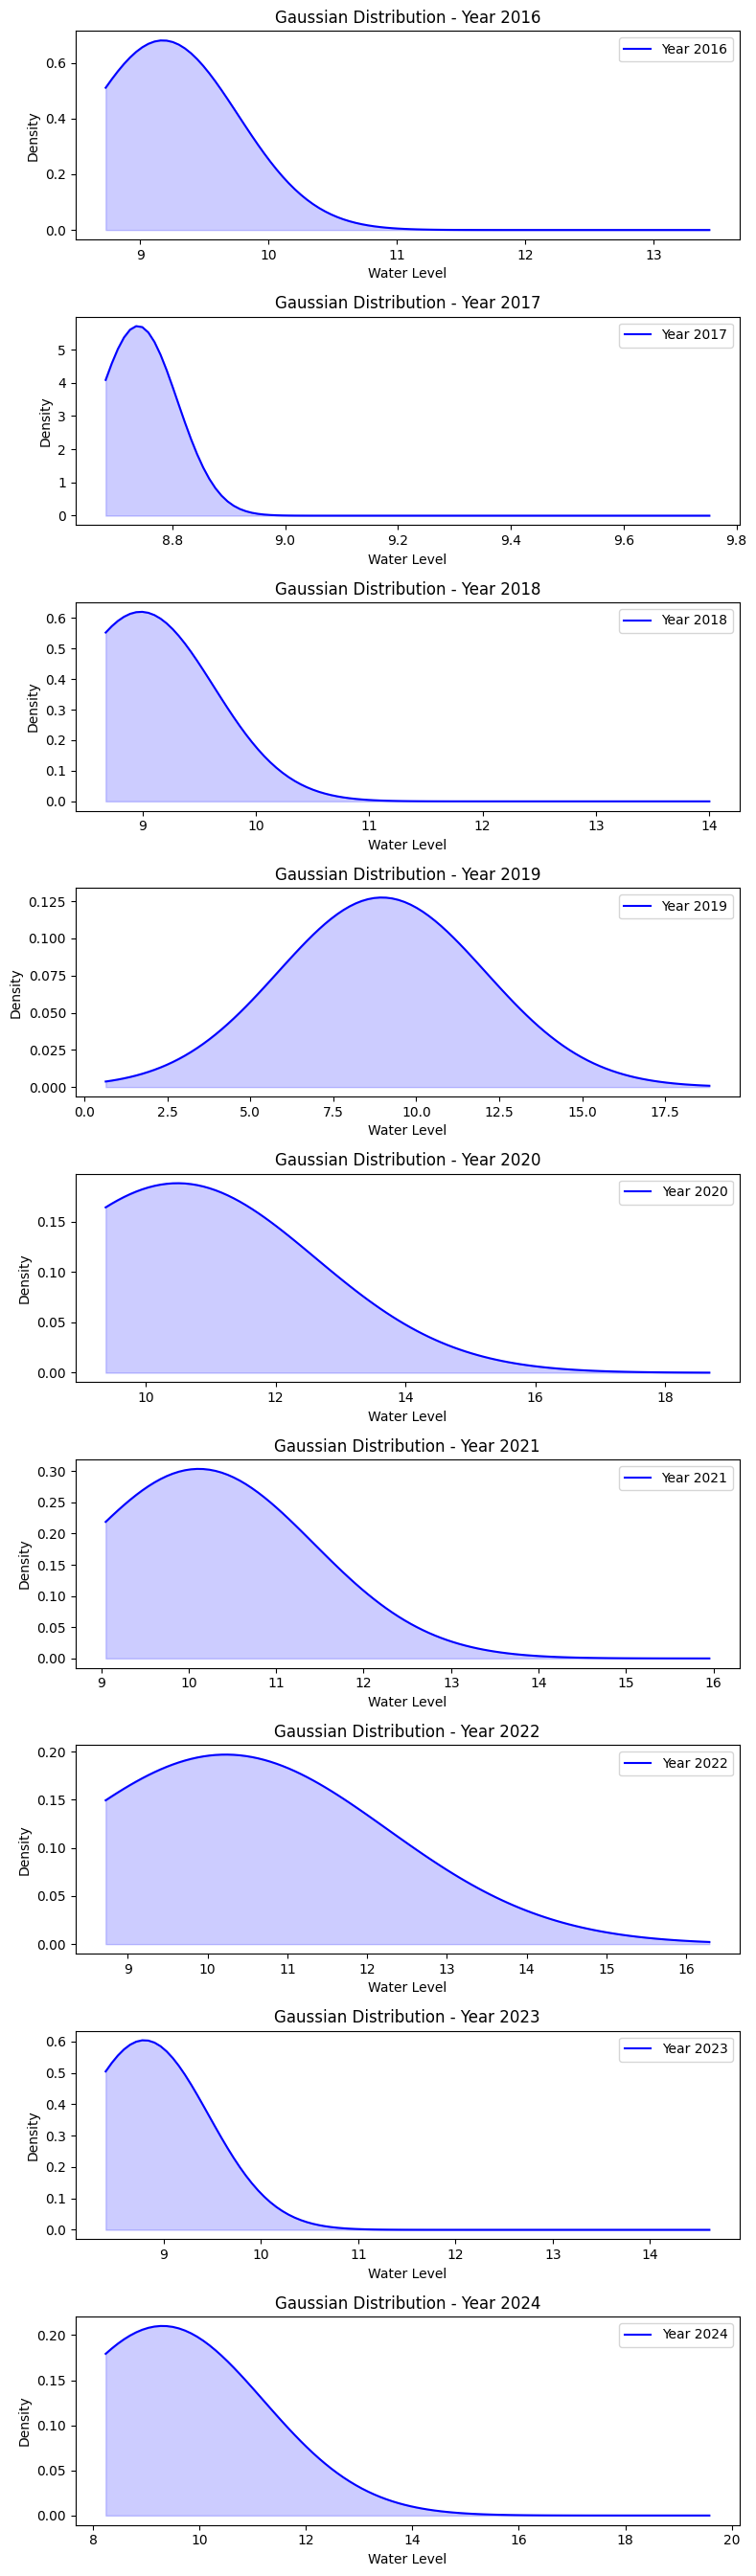

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming merged_df has 'year' and 'water_level' columns
years = sorted(merged_df['year'].unique())  # Get unique years in sorted order

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(8, len(years) * 3))

for i, year in enumerate(years):
    # Filter data for the specific year
    data = merged_df[merged_df['year'] == year]['water_level'].dropna()
    
    # Fit Gaussian Distribution
    mu, sigma = norm.fit(data)  # Mean and standard deviation

    # Create range for x-axis
    x = np.linspace(min(data), max(data), 100)
    
    # Compute Gaussian PDF
    pdf = norm.pdf(x, mu, sigma)

    # Plot the Gaussian curve
    ax = axes[i] if len(years) > 1 else axes  # Handle single subplot case
    ax.plot(x, pdf, label=f'Year {year}', color='b')
    ax.fill_between(x, pdf, alpha=0.2, color='b')
    
    # Graph settings
    ax.set_xlabel("Water Level")
    ax.set_ylabel("Density")
    ax.set_title(f"Gaussian Distribution - Year {year}")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()